In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MaxAbsScaler, RobustScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
X_train = pd.read_csv('train.csv')
X_test = pd.read_csv('test.csv')

In [3]:
print('Train shape->', X_train.shape, 'Test shape->', X_test.shape)

Train shape-> (552, 17) Test shape-> (138, 16)


In [4]:
X_train.head()

,id,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P
0,1,b,18.42,10.415,y,p,aa,v,0.125,t,f,0,f,g,120.0,375,1
1,2,a,21.75,11.750,u,g,c,v,0.250,f,f,0,t,g,180.0,0,1
2,3,b,30.17,1.085,y,p,c,v,0.040,f,f,0,f,g,170.0,179,1
3,4,b,22.67,2.540,y,p,c,h,2.585,t,f,0,f,g,0.0,0,0
4,5,a,36.00,1.000,u,g,c,v,2.000,t,t,11,f,g,0.0,456,0


In [5]:
y_train = X_train['P']
X_train.drop(columns = ['P', 'id'], inplace = True)
X_test.drop(columns = ['id'], inplace = True)

In [6]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552 entries, 0 to 551
Data columns (total 15 columns):
A    544 non-null object
B    543 non-null float64
C    552 non-null float64
D    547 non-null object
E    547 non-null object
F    545 non-null object
G    545 non-null object
H    552 non-null float64
I    552 non-null object
J    552 non-null object
K    552 non-null int64
L    552 non-null object
M    552 non-null object
N    541 non-null float64
O    552 non-null int64
dtypes: float64(4), int64(2), object(9)
memory usage: 64.8+ KB


In [7]:
X_train.describe()

,B,C,H,K,N,O
count,543.000000,552.000000,552.000000,552.000000,541.000000,552.000000
mean,31.364899,4.780136,2.259176,2.318841,175.162662,1087.576087
std,11.873665,4.938454,3.442564,4.297867,154.873746,5758.841945
min,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.500000,1.000000,0.165000,0.000000,60.000000,0.000000
50%,28.170000,2.750000,1.000000,0.000000,152.000000,3.500000
75%,37.665000,7.561250,2.750000,3.000000,268.000000,364.750000
max,80.250000,28.000000,28.500000,40.000000,1160.000000,100000.000000


In [8]:
scaler = RobustScaler()
X_train_numerical = X_train.select_dtypes(include=[np.number])
X_test_numerical = X_test.select_dtypes(include=[np.number])

X_train_numerical = X_train_numerical.fillna(X_train_numerical.std())
X_test_numerical = X_test_numerical.fillna(X_test_numerical.std())

scaler.fit(X_train_numerical)
train_scaled = scaler.fit_transform(X_train_numerical)
test_scaled = scaler.fit_transform(X_test_numerical)

In [9]:
X_train_numerical = pd.DataFrame(train_scaled, index = X_train_numerical.index, columns = X_train_numerical.columns)
X_test_numerical = pd.DataFrame(test_scaled, index = X_test_numerical.index, columns = X_test_numerical.columns)

In [10]:
X_train_numerical.head()

,B,C,H,K,N,O
0,-0.621430,1.168223,-0.338491,0.000000,-0.183546,1.018506
1,-0.401519,1.371690,-0.290135,0.000000,0.132243,-0.009596
2,0.154532,-0.253763,-0.371373,0.000000,0.079612,0.481151
3,-0.340763,-0.032006,0.613153,0.000000,-0.815125,-0.009596
4,0.539541,-0.266717,0.386847,3.666667,-0.815125,1.240576


In [11]:
X_test_numerical.head()

,B,C,H,K,N,O
0,-0.013934,0.155885,1.061053,1.000000,0.748768,-0.017
1,-0.071028,0.467654,4.218947,0.000000,-0.527094,-0.017
2,-0.008496,2.502468,1.709474,1.666667,-0.044335,-0.017
3,1.005607,0.813718,2.692632,1.000000,-0.871921,-0.017
4,-0.767715,0.571577,-0.202105,0.000000,-0.477833,-0.017


In [12]:
X_train.update(X_train_numerical)
X_test.update(X_test_numerical)

In [13]:
X_train.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O
0,b,-0.621430,1.168223,y,p,aa,v,-0.338491,t,f,0.000000,f,g,-0.183546,1.018506
1,a,-0.401519,1.371690,u,g,c,v,-0.290135,f,f,0.000000,t,g,0.132243,-0.009596
2,b,0.154532,-0.253763,y,p,c,v,-0.371373,f,f,0.000000,f,g,0.079612,0.481151
3,b,-0.340763,-0.032006,y,p,c,h,0.613153,t,f,0.000000,f,g,-0.815125,-0.009596
4,a,0.539541,-0.266717,u,g,c,v,0.386847,t,t,3.666667,f,g,-0.815125,1.240576


In [14]:
X_test.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O
0,b,-0.013934,0.155885,u,g,w,v,1.061053,t,t,1.000000,t,g,0.748768,-0.017
1,b,-0.071028,0.467654,u,g,w,v,4.218947,t,f,0.000000,t,g,-0.527094,-0.017
2,b,-0.008496,2.502468,u,g,aa,v,1.709474,t,t,1.666667,t,g,-0.044335,-0.017
3,a,1.005607,0.813718,u,g,q,v,2.692632,t,t,1.000000,t,g,-0.871921,-0.017
4,b,-0.767715,0.571577,u,g,k,v,-0.202105,t,f,0.000000,f,g,-0.477833,-0.017


In [15]:
X_train.describe()

,B,C,H,K,N,O
count,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000
mean,0.212455,0.309413,0.487109,0.772947,0.104656,2.972107
std,0.794629,0.752670,1.331746,1.432622,0.807086,15.788463
min,-1.053745,-0.419127,-0.386847,0.000000,-0.815125,-0.009596
25%,-0.369820,-0.266717,-0.323017,0.000000,-0.446704,-0.009596
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.630180,0.733283,0.676983,1.000000,0.553296,0.990404
max,3.461780,3.848352,10.638298,13.333333,5.290138,274.150788


In [16]:
category_columns = X_train.select_dtypes(include=['object'])
for column in list(category_columns.columns):
    X_train[column] = X_train[column].astype('category')
    X_test[column] = X_test[column].astype('category')
    print(column,':')
    print('------')
    d = X_train[column].value_counts()
    for key,value in d.items():
        print(key, value)
    print()

A :
------
b 374
a 170

D :
------
u 416
y 129
l 2

E :
------
g 416
p 129
gg 2

F :
------
c 115
q 66
w 50
i 47
ff 43
aa 42
k 40
x 31
m 31
cc 29
d 24
e 18
j 8
r 1

G :
------
v 319
h 113
bb 47
ff 46
z 7
j 6
dd 3
o 2
n 2

I :
------
t 286
f 266

J :
------
f 319
t 233

L :
------
f 298
t 254

M :
------
g 497
s 48
p 7



In [17]:
for column in list(category_columns):
    print(column,':')
    print('------')
    d = X_test[column].value_counts()
    for key,value in d.items():
        print(key, value)
    print()

A :
------
b 94
a 40

D :
------
u 103
y 34

E :
------
g 103
p 34

F :
------
c 22
w 14
q 12
i 12
cc 12
aa 12
k 11
ff 10
x 7
m 7
e 7
d 6
r 2
j 2

G :
------
v 80
h 25
bb 12
ff 11
dd 3
n 2
j 2
z 1

I :
------
t 75
f 63

J :
------
f 76
t 62

L :
------
f 76
t 62

M :
------
g 128
s 9
p 1



In [18]:
# In column A, fill missing with categorical variable 'b'
# In column D, fill missing with categorical variable 'u'
# In column E, fill missing with categorical variable 'g'
# In column F, fill missing with categorical variable 'c'
# In column G, fill missing with categorical variable 'v'

X_train['A'] = X_train['A'].fillna('b')
X_train['D'] = X_train['D'].fillna('u')
X_train['E'] = X_train['E'].fillna('g')
X_train['F'] = X_train['F'].fillna('c')
X_train['G'] = X_train['G'].fillna('v')

X_test['A'] = X_test['A'].fillna('b')
X_test['D'] = X_test['D'].fillna('u')
X_test['E'] = X_test['E'].fillna('g')
X_test['F'] = X_test['F'].fillna('c')
X_test['G'] = X_test['G'].fillna('v')

In [19]:
outliers = []
for col in list(X_train.columns):
    if X_train[col].dtype.name != 'category':
        Q1 = np.percentile(X_train[col], 25)
        Q3 = np.percentile(X_train[col], 75)
        step = 1.5*(Q3-Q1)
        temp = X_train[~((X_train[col] >= Q1 - step) & (X_train[col] <= Q3 + step))]
        outliers.append(list(temp.index))
        print(col)
        print(temp.index)
        print()
common_outliers = set([])
common_outliers.update(outliers[0])
for i in range(1, len(outliers)):
    common_outliers.intersection(outliers[i])

common_outliers = list(common_outliers)
common_outliers

B
Int64Index([32, 44, 45, 85, 90, 104, 161, 172, 174, 364, 403, 406, 449, 460], dtype='int64')

C
Int64Index([94, 104, 128, 187, 270, 320, 367, 368, 375, 388, 466], dtype='int64')

H
Int64Index([  9,  17,  32,  44,  64,  72, 104, 113, 115, 116, 126, 134, 137,
            139, 142, 145, 147, 174, 193, 219, 227, 242, 244, 258, 261, 270,
            286, 297, 306, 320, 339, 346, 348, 354, 368, 375, 393, 400, 431,
            451, 454, 476, 493, 519, 525],
           dtype='int64')

K
Int64Index([  4,   8,  12,  19,  31,  55,  61,  66,  84,  85, 104, 109, 119,
            129, 134, 136, 139, 142, 153, 229, 235, 237, 239, 241, 258, 260,
            267, 270, 294, 297, 298, 300, 306, 310, 320, 339, 348, 364, 368,
            371, 375, 379, 397, 409, 412, 422, 424, 440, 441, 442, 454, 471,
            478, 484, 489, 501, 518, 533, 534, 536, 541, 547],
           dtype='int64')

N
Int64Index([125, 152, 181, 187, 224, 291, 311, 332, 374, 448], dtype='int64')

O
Int64Index([ 16,  20,  56,  82,  

[32, 161, 449, 104, 44, 45, 172, 174, 364, 460, 403, 85, 406, 90]

In [20]:
ind = X_train[X_train['O'] >= 25].index
ind
common_outliers.extend(list(ind))
common_outliers

[32,
 161,
 449,
 104,
 44,
 45,
 172,
 174,
 364,
 460,
 403,
 85,
 406,
 90,
 16,
 93,
 103,
 112,
 128,
 154,
 174,
 301,
 305,
 348,
 358,
 422,
 462]

In [21]:
X_train = X_train.drop(X_train.index[common_outliers]).reset_index(drop = True)
y_train = y_train.drop(y_train.index[common_outliers]).reset_index(drop = True)

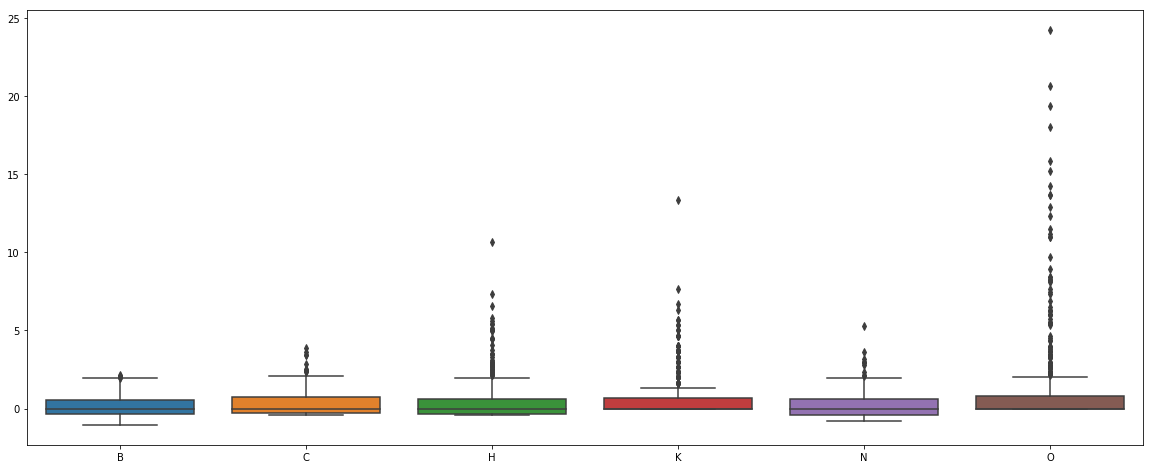

In [22]:
plt.figure(figsize = (20,8))
_ = sns.boxplot(data=X_train, orient='v')

In [23]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [24]:
train_features = list(X_train.columns)
test_features = list(X_test.columns)
print(train_features)
print(test_features)
final_features = list(set(train_features).intersection(set(test_features)))

['B', 'C', 'H', 'K', 'N', 'O', 'A_a', 'A_b', 'D_l', 'D_u', 'D_y', 'E_g', 'E_gg', 'E_p', 'F_aa', 'F_c', 'F_cc', 'F_d', 'F_e', 'F_ff', 'F_i', 'F_j', 'F_k', 'F_m', 'F_q', 'F_r', 'F_w', 'F_x', 'G_bb', 'G_dd', 'G_ff', 'G_h', 'G_j', 'G_n', 'G_o', 'G_v', 'G_z', 'I_f', 'I_t', 'J_f', 'J_t', 'L_f', 'L_t', 'M_g', 'M_p', 'M_s']
['B', 'C', 'H', 'K', 'N', 'O', 'A_a', 'A_b', 'D_u', 'D_y', 'E_g', 'E_p', 'F_aa', 'F_c', 'F_cc', 'F_d', 'F_e', 'F_ff', 'F_i', 'F_j', 'F_k', 'F_m', 'F_q', 'F_r', 'F_w', 'F_x', 'G_bb', 'G_dd', 'G_ff', 'G_h', 'G_j', 'G_n', 'G_v', 'G_z', 'I_f', 'I_t', 'J_f', 'J_t', 'L_f', 'L_t', 'M_g', 'M_p', 'M_s']


In [25]:
X_train = X_train[final_features]
X_train.head()

,G_j,F_m,F_j,L_f,F_k,A_a,G_v,M_s,G_z,F_x,...,A_b,D_y,K,C,E_p,G_ff,G_h,M_g,I_t,B
0,0,0,0,1,0,0,1,0,0,0,...,1,1,0.000000,1.168223,1,0,0,1,1,-0.621430
1,0,0,0,0,0,1,1,0,0,0,...,0,0,0.000000,1.371690,0,0,0,1,0,-0.401519
2,0,0,0,1,0,0,1,0,0,0,...,1,1,0.000000,-0.253763,1,0,0,1,0,0.154532
3,0,0,0,1,0,0,0,0,0,0,...,1,1,0.000000,-0.032006,1,0,1,1,1,-0.340763
4,0,0,0,1,0,1,1,0,0,0,...,0,0,3.666667,-0.266717,0,0,0,1,1,0.539541


In [26]:
X_test = X_test[final_features]

In [27]:
clf1 = RandomForestClassifier()

clf1.fit(X_train, y_train)
pred = clf1.predict(X_test)

In [28]:
output = pd.DataFrame()

X_test_temp = pd.read_csv('test.csv')
output['id'] = X_test_temp['id']
output['P'] = pred
output.to_csv('output_v2.csv', index = False)

In [29]:
output.head()

,id,P
0,553,0
1,554,0
2,555,0
3,556,0
4,557,1


### Score: 86.24 --v2.0

In [30]:
output['P'].value_counts()

1    75
0    63
Name: P, dtype: int64

In [31]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators':[10, 50, 100], 'max_features':['auto','log2', 'sqrt'] }

clf = RandomForestClassifier()
grid_obj = GridSearchCV(clf, parameters)
grid_fit = grid_obj.fit(X_train, y_train)

best_clf = grid_fit.best_estimator_
best_predictions = best_clf.predict(X_test)


In [32]:
output_2 = pd.DataFrame()

X_test = pd.read_csv('test.csv')
output_2['id'] = X_test['id']
output_2['P'] = best_predictions
output_2.to_csv('output_v3.csv', index = False)

In [33]:
output_2['P'].value_counts()

1    75
0    63
Name: P, dtype: int64

### score: 89.13  --v3.0